In [1]:
from sklearn.cluster import DBSCAN,KMeans
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Understanding the Data

In [2]:
data = pd.read_csv('/kaggle/input/customer-segmentation/Train.csv')

<h3>The Numbers</h3>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [5]:
data.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


<h3>Visualisation</h3>

Text(0.5, 1.0, 'Gender Distribution')

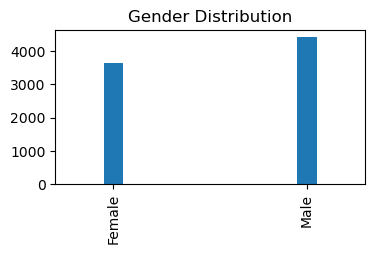

In [6]:
plt.figure(figsize=(4,2))
data['Gender'].value_counts().sort_values(ascending=True).plot(kind='bar',width=0.1)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Customers that ever married')

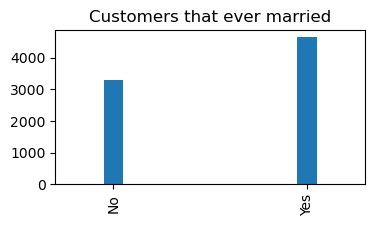

In [7]:
plt.figure(figsize=(4,2))
data['Ever_Married'].value_counts().sort_values(ascending=True).plot(kind='bar',width=0.1)
plt.title('Customers that ever married')

Text(0.5, 1.0, 'Age Distribution')

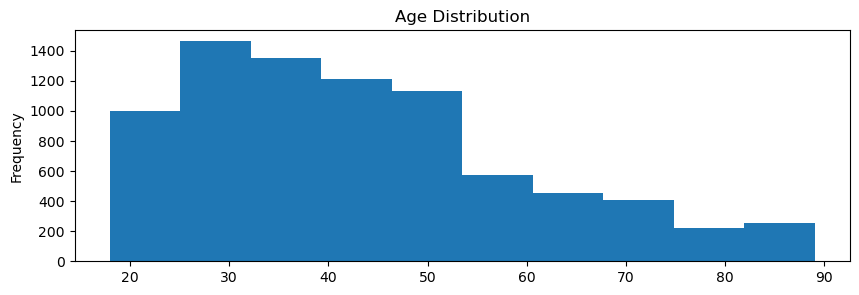

In [8]:
plt.figure(figsize=(10,3))
data['Age'].plot(kind='hist')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Graduated Customers')

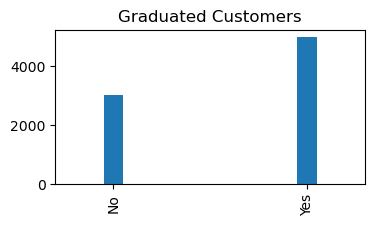

In [9]:
plt.figure(figsize=(4,2))
data['Graduated'].value_counts().sort_values(ascending=True).plot(kind='bar',width=0.1)
plt.title('Graduated Customers')

Text(0.5, 1.0, 'Profession Distribution')

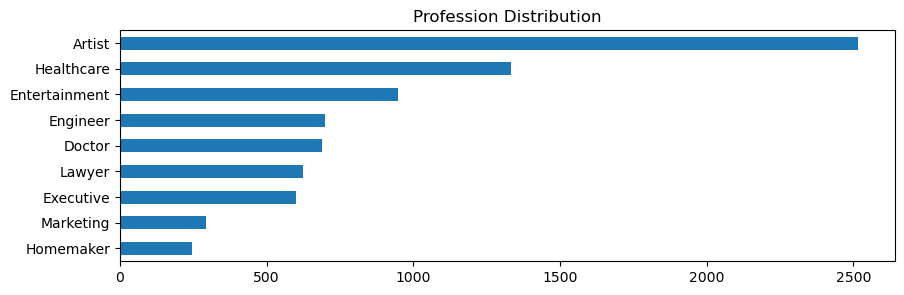

In [10]:
plt.figure(figsize=(10,3))
data['Profession'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Profession Distribution')

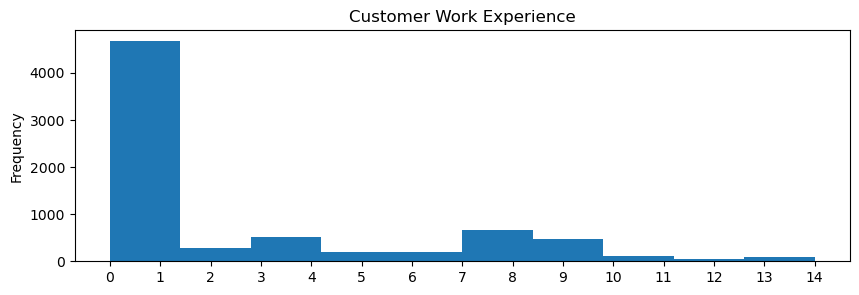

In [11]:
plt.figure(figsize=(10,3))
data['Work_Experience'].plot(kind='hist')
plt.title('Customer Work Experience')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.show()

<AxesSubplot:title={'center':'Customer Spending Score'}>

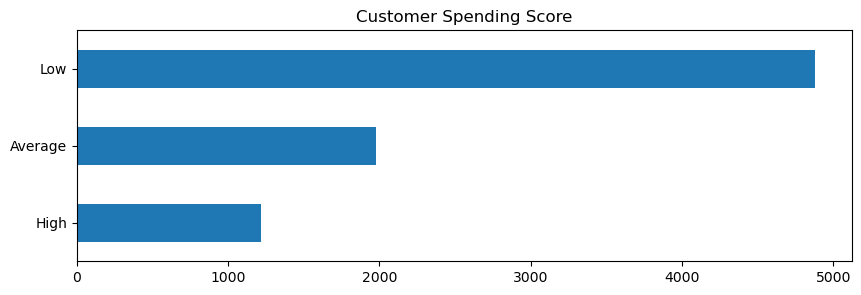

In [12]:
plt.figure(figsize=(10,3))
plt.title('Customer Spending Score')
data['Spending_Score'].value_counts().sort_values(ascending=True).plot(kind='barh')

Text(0.5, 1.0, 'Customer Family Size')

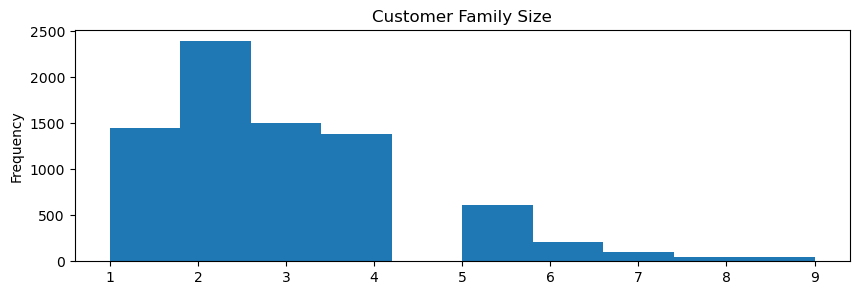

In [13]:
plt.figure(figsize=(10,3))
data['Family_Size'].plot(kind='hist')
plt.title('Customer Family Size')

Text(0.5, 1.0, 'Customers by Category')

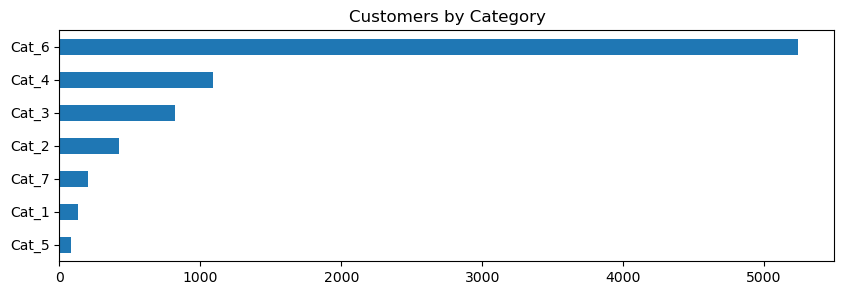

In [14]:
plt.figure(figsize=(10,3))
data['Var_1'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Customers by Category')

Text(0.5, 1.0, 'Customers by Cluster(Segment)')

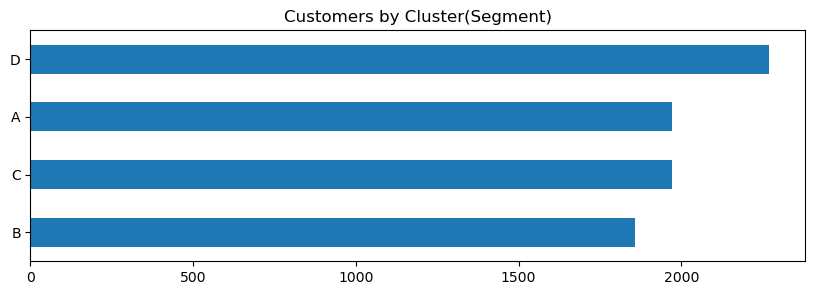

In [15]:
plt.figure(figsize=(10,3))
data['Segmentation'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Customers by Cluster(Segment)')

# Preprocessing

In [16]:
segment = data['Segmentation']
data.drop(columns='Segmentation',inplace=True)

<h3>Missing Values</h3>

In [17]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

In [18]:
data.fillna(data.mean(numeric_only=True),inplace=True)
data.fillna(method='ffill',inplace=True)

In [19]:
data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

<h3>Categorical Data Encoding</h3>

In [20]:
cats = data.select_dtypes(include='object')
data.drop(columns=cats.columns,inplace=True)

In [21]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
cats = ohe.fit_transform(cats)
cats = pd.DataFrame(cats)
data = cats.join(data)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0                8068 non-null   float64
 1   1                8068 non-null   float64
 2   2                8068 non-null   float64
 3   3                8068 non-null   float64
 4   4                8068 non-null   float64
 5   5                8068 non-null   float64
 6   6                8068 non-null   float64
 7   7                8068 non-null   float64
 8   8                8068 non-null   float64
 9   9                8068 non-null   float64
 10  10               8068 non-null   float64
 11  11               8068 non-null   float64
 12  12               8068 non-null   float64
 13  13               8068 non-null   float64
 14  14               8068 non-null   float64
 15  15               8068 non-null   float64
 16  16               8068 non-null   float64
 17  17            

<h3>Scaling</h3>

In [23]:
scaler = MinMaxScaler()
data =  scaler.fit_transform(data)
data = pd.DataFrame(data)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# Model Training & Evaluation

<h3>KMeans Clustering</h3>

In [24]:
kmeans = KMeans(n_clusters=4)

In [25]:
kmeans_labels = kmeans.fit_predict(data)

In [26]:
kmeans_labels = pd.Series(kmeans_labels)

2    2806
0    1901
1    1705
3    1656
dtype: int64

Text(0.5, 1.0, 'Label Prediction Distribution')

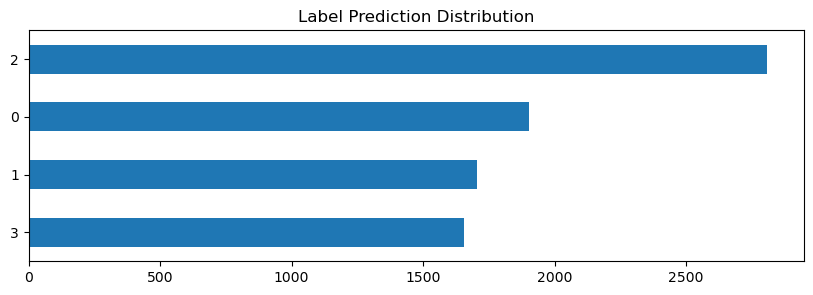

In [37]:
plt.figure(figsize=(10,3))
kmeans_labels.value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Label Prediction Distribution')

Text(0.5, 1.0, 'True Label Distribution')

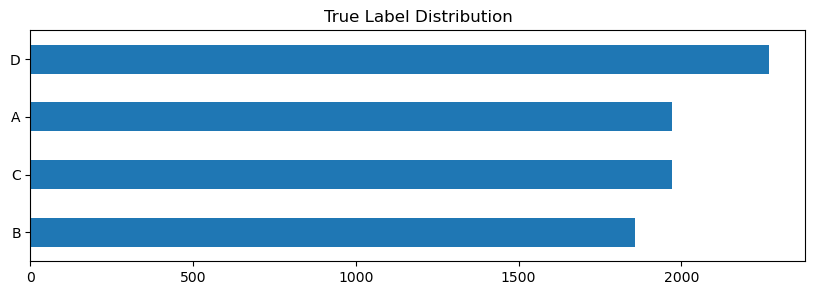

In [35]:
plt.figure(figsize=(10,3))
segment.value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('True Label Distribution')

# Conclusion

I do not have the means  to evaluate the performance of this model because the orginal lables are letters and the predicted ones are numbers, it is impossible to know which number is equavalent to which letter. 

It is however, obvious from the bar graphs that predicted label 2 might be equivalent to class D.

Suggestions for visualising the clusters are most welcome.